In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# import libraries for plotting
import matplotlib.pyplot as plt
import seaborn as sns
# from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
pd.set_option('display.max_rows', 500)
pd.options.display.float_format = '{:,.2f}'.format
RANDOM_STATE = 42
from datetime import date

In [2]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
###Products

In [3]:
df_products = pd.read_csv('C:/Users/evive/Downloads/sociodemographic_df.csv')

In [4]:
df_products.head().T

,0,1,2,3,4
Unnamed: 0,0,1,2,3,4
pk_cid,1375586,1050611,1050612,1050613,1050614
pk_partition,2018-01-28,2018-01-28,2018-01-28,2018-01-28,2018-01-28
country_id,ES,ES,ES,ES,ES
region_code,29.00,13.00,13.00,50.00,50.00
gender,H,V,V,H,V
age,35,23,23,22,23
deceased,N,N,N,N,N
salary,"87,218.10","35,548.74","122,179.11","119,775.54",NaN


In [5]:
df_products.describe()

,Unnamed: 0,pk_cid,region_code,age,salary
count,"5,962,924.00","5,962,924.00","5,960,660.00","5,962,924.00","4,450,821.00"
mean,"7,155,425.01","1,234,929.80",25.81,29.76,"115,816.72"
std,"3,920,784.28","162,302.04",13.60,11.98,"199,551.89"
min,0.00,"15,891.00",1.00,2.00,"1,202.73"
25%,"4,240,385.75","1,112,532.00",13.00,22.00,"61,500.63"
50%,"7,499,346.50","1,231,097.00",28.00,25.00,"88,654.65"
75%,"10,201,422.25","1,352,339.00",36.00,34.00,"131,669.91"
max,"13,647,308.00","1,553,689.00",52.00,105.00,"28,894,395.51"


In [6]:
df_products['salary'].fillna(value='nada', inplace=True)

In [7]:
df_products = df_products[df_products['salary'] != 'nada']

In [8]:
df_products['region_code'].fillna(value='nada', inplace=True)

In [9]:
df_products = df_products[df_products['region_code'] != 'nada']

In [10]:
df_products.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4450784 entries, 0 to 5962922
Data columns (total 9 columns):
 #   Column        Dtype 
---  ------        ----- 
 0   Unnamed: 0    int64 
 1   pk_cid        int64 
 2   pk_partition  object
 3   country_id    object
 4   region_code   object
 5   gender        object
 6   age           int64 
 7   deceased      object
 8   salary        object
dtypes: int64(3), object(6)
memory usage: 339.6+ MB


In [11]:
df_products['salary'] = df_products['salary'].astype(int)

In [12]:
df_products['region_code'] = df_products['region_code'].astype(int)

In [13]:
df_products['country_id'].value_counts()

ES    4450784
Name: country_id, dtype: int64

In [14]:
df_products['age'].describe()

count   4,450,784.00
mean           29.96
std            12.01
min             2.00
25%            22.00
50%            25.00
75%            34.00
max           105.00
Name: age, dtype: float64

In [15]:
reduce_df_products = ['region_code', 'salary', 'age']

In [16]:
reduce_df = df_products[reduce_df_products]

In [17]:
reduce_df.head(5).T

,0,1,2,3,5
region_code,29,13,13,50,45
salary,87218,35548,122179,119775,22220
age,35,23,23,22,23


In [18]:
reduce_df.describe()

,region_code,salary,age
count,"4,450,784.00","4,450,784.00","4,450,784.00"
mean,25.73,"115,815.73",29.96
std,13.61,"199,552.39",12.01
min,1.00,"1,202.00",2.00
25%,13.00,"61,499.00",22.00
50%,28.00,"88,654.00",25.00
75%,36.00,"131,669.00",34.00
max,52.00,"28,894,395.00",105.00


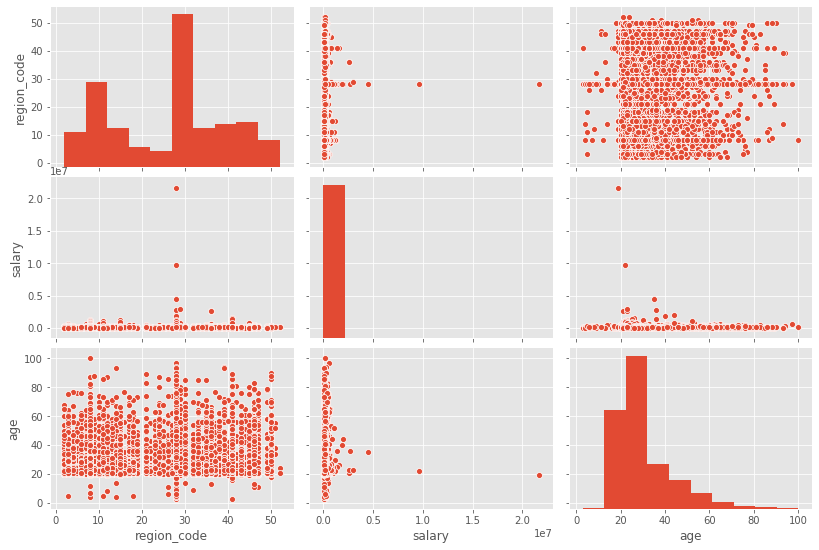

In [19]:
sns.pairplot(reduce_df.sample(10000), aspect=1.5)

In [20]:

reduce_df['region'] = pd.qcut(reduce_df['region_code'], q=5, labels=range(5))

C:\Users\evive\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [21]:
reduce_df['salario'] = pd.qcut(reduce_df['salary'], q=5, labels=range(5))

C:\Users\evive\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [22]:
reduce_df['edad'] = pd.qcut(reduce_df['age'], q=5, labels=range(5))

C:\Users\evive\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [23]:
reduce_df.head(5).T

,0,1,2,3,5
region_code,29,13,13,50,45
salary,87218,35548,122179,119775,22220
age,35,23,23,22,23
region,3,1,1,4,4
salario,2,0,3,3,0
edad,3,1,1,0,1


In [24]:
reduce_df.pivot_table(index='salario', values=['region_code'], aggfunc=[len, np.mean])


,len,mean
,region_code,region_code
salario,,
0,890176,25.89
1,890169,26.42
2,890137,26.30
3,890156,25.62
4,890146,24.44


In [25]:
reduce_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4450784 entries, 0 to 5962922
Data columns (total 6 columns):
 #   Column       Dtype   
---  ------       -----   
 0   region_code  int32   
 1   salary       int32   
 2   age          int64   
 3   region       category
 4   salario      category
 5   edad         category
dtypes: category(3), int32(2), int64(1)
memory usage: 274.6 MB


In [26]:
cruce_table = pd.crosstab(reduce_df['edad'], reduce_df['salario'])


In [27]:
cruce_table

salario,0,1,2,3,4
edad,,,,,
0,255562,258229,254570,259956,263586
1,110510,108747,107153,110136,113788
2,192270,178715,174630,167245,171899
3,189602,186743,184052,171130,155633
4,142232,157735,169732,181689,185240


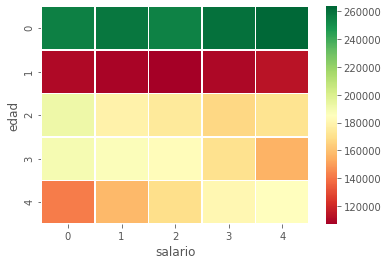

In [28]:
sns.heatmap(cruce_table, cmap='RdYlGn', linewidths=0.5)


In [29]:
pipe = Pipeline(
        steps=[
            ('StandardScaler', StandardScaler()),
            ('KMeans', KMeans(n_clusters=4))
        ]
)

In [30]:
pipe.fit(reduce_df[['salary', 'region_code', 'age']])

Pipeline(memory=None,
         steps=[('StandardScaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('KMeans',
                 KMeans(algorithm='auto', copy_x=True, init='k-means++',
                        max_iter=300, n_clusters=4, n_init=10, n_jobs=None,
                        precompute_distances='auto', random_state=None,
                        tol=0.0001, verbose=0))],
         verbose=False)

In [31]:
Pipeline(memory=None,
         steps=[('StandardScaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('KMeans',
                 KMeans(algorithm='auto', copy_x=True, init='k-means++',
                        max_iter=300, n_clusters=4, n_init=10, n_jobs=None,
                        precompute_distances='auto', random_state=None,
                        tol=0.0001, verbose=0))],
         verbose=False)


Pipeline(memory=None,
         steps=[('StandardScaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('KMeans',
                 KMeans(algorithm='auto', copy_x=True, init='k-means++',
                        max_iter=300, n_clusters=4, n_init=10, n_jobs=None,
                        precompute_distances='auto', random_state=None,
                        tol=0.0001, verbose=0))],
         verbose=False)

In [32]:
pipe

Pipeline(memory=None,
         steps=[('StandardScaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('KMeans',
                 KMeans(algorithm='auto', copy_x=True, init='k-means++',
                        max_iter=300, n_clusters=4, n_init=10, n_jobs=None,
                        precompute_distances='auto', random_state=None,
                        tol=0.0001, verbose=0))],
         verbose=False)

In [33]:
reduce_df['Cluster'] = pipe.predict(reduce_df[['salary', 'region_code', 'age']])


C:\Users\evive\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [34]:
reduce_df['Cluster']

0          1
1          0
2          0
3          1
5          1
          ..
5962917    1
5962918    1
5962919    1
5962920    1
5962922    1
Name: Cluster, Length: 4450784, dtype: int32

In [35]:
reduce_df.groupby('Cluster').agg({
    'salary': 'mean',
    'region_code': 'first',
    'age': 'first'
})

,salary,region_code,age
Cluster,,,
0,"108,440.11",13,23
1,"114,533.50",29,35
2,"12,035,826.77",28,24
3,"123,915.24",50,65


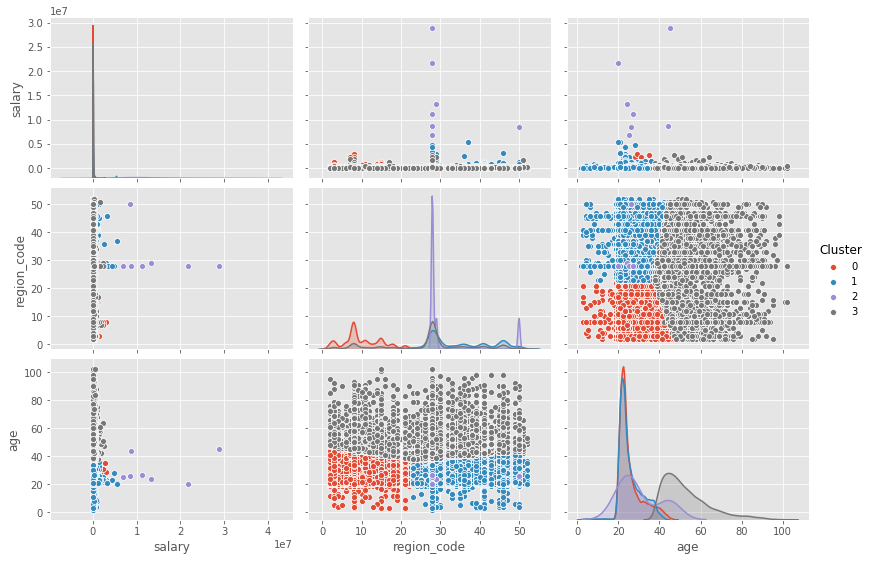

In [36]:

sns.pairplot(reduce_df.sample(50000), vars=['salary', 'region_code', 'age'], hue='Cluster', aspect=1.5)
plt.show()